In [ ]:
# Bald Classification or Detection 200K Images.
# Dataset = https://www.kaggle.com/datasets/ashishjangra27/bald-classification-200k-images-celeba

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile("/content/drive/MyDrive/Dataset.zip",'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Dataset')
print('Done with unzipping.')

In [ ]:
fldr1 = '/content/drive/MyDrive/Test/Bald'
fldr2 = '/content/drive/MyDrive/Test/NotBald'

In [ ]:
import os
file1 = os.listdir(fldr1)
file2 = os.listdir(fldr2)

In [ ]:
import cv2 as cv2

In [ ]:
images = []
for file in file1:
    total = fldr1+'/'+file
    print(total)
    image =cv2.imread(total)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

/content/drive/MyDrive/Test/Bald/160247.jpg
/content/drive/MyDrive/Test/Bald/160015.jpg
/content/drive/MyDrive/Test/Bald/160014.jpg
/content/drive/MyDrive/Test/Bald/160096.jpg
/content/drive/MyDrive/Test/Bald/160030.jpg
/content/drive/MyDrive/Test/Bald/160008.jpg
/content/drive/MyDrive/Test/Bald/160021.jpg
/content/drive/MyDrive/Test/Bald/161007.jpg
/content/drive/MyDrive/Test/Bald/160890.jpg
/content/drive/MyDrive/Test/Bald/160591.jpg
/content/drive/MyDrive/Test/Bald/160924.jpg
/content/drive/MyDrive/Test/Bald/161462.jpg
/content/drive/MyDrive/Test/Bald/160829.jpg
/content/drive/MyDrive/Test/Bald/160403.jpg
/content/drive/MyDrive/Test/Bald/160679.jpg
/content/drive/MyDrive/Test/Bald/160632.jpg
/content/drive/MyDrive/Test/Bald/161229.jpg
/content/drive/MyDrive/Test/Bald/161366.jpg
/content/drive/MyDrive/Test/Bald/161170.jpg
/content/drive/MyDrive/Test/Bald/160548.jpg
/content/drive/MyDrive/Test/Bald/161243.jpg
/content/drive/MyDrive/Test/Bald/160332.jpg
/content/drive/MyDrive/Test/Bald

In [ ]:
for file in file2:
    total = fldr2+'/'+file
    print(total)
    image =cv2.imread(total)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Test/NotBald/165329.jpg
/content/drive/MyDrive/Test/NotBald/165315.jpg
/content/drive/MyDrive/Test/NotBald/165326.jpg
/content/drive/MyDrive/Test/NotBald/165319.jpg
/content/drive/MyDrive/Test/NotBald/165299.jpg
/content/drive/MyDrive/Test/NotBald/165297.jpg
/content/drive/MyDrive/Test/NotBald/165295.jpg
/content/drive/MyDrive/Test/NotBald/165328.jpg
/content/drive/MyDrive/Test/NotBald/165298.jpg
/content/drive/MyDrive/Test/NotBald/165314.jpg
/content/drive/MyDrive/Test/NotBald/165323.jpg
/content/drive/MyDrive/Test/NotBald/165316.jpg
/content/drive/MyDrive/Test/NotBald/165325.jpg
/content/drive/MyDrive/Test/NotBald/165306.jpg
/content/drive/MyDrive/Test/NotBald/165296.jpg
/content/drive/MyDrive/Test/NotBald/165327.jpg
/content/drive/MyDrive/Test/NotBald/165308.jpg
/content/drive/MyDrive/Test/NotBald/165302.jpg
/content/drive/MyDrive/Test/NotBald/165300.jpg
/content/drive/MyDrive/Test/NotBald/165305.jpg
/content/

In [ ]:
print(len(images))

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5])

In [ ]:
path_list = []
for file in file1:
  total = fldr1+'/'+file
  path_list.append(total)



In [ ]:
for file in file2:
  total = fldr2+'/'+file
  path_list.append(total)

In [ ]:
print(len(path_list))

In [ ]:
print(path_list[0:5])

In [ ]:
dependent_feature = []
for i in path_list:
    temp = i.split('/')[5]
    dependent_feature.append(temp)

In [ ]:
print(dependent_feature)

In [ ]:
print(len(dependent_feature))

In [ ]:
print(len(images))

In [ ]:
real_dependent_feature = []
for i in dependent_feature:
    if i=='Bald':
        real_dependent_feature.append(1)
    else:
        real_dependent_feature.append(0)

In [ ]:
print(real_dependent_feature)

In [ ]:
print(type(real_dependent_feature))

In [ ]:
import numpy as np
dependent_f = np.array(real_dependent_feature)
image_arr = np.array(images)

In [ ]:
print(type(dependent_f))
print(type(image_arr))

In [ ]:
print(dependent_f[0:5])

In [ ]:
print(image_arr[0])

In [ ]:
print(dependent_f)

In [ ]:
value , count = np.unique(dependent_f , return_counts=True)
print(count)
print(value)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labeling = ['Bald' , 'NotBald']
values = [4547, 198052]
ax.bar(labeling , values)
plt.show()

In [ ]:
image_f = image_arr/255

In [ ]:
print(image_f.shape)

In [ ]:
print(image_f[0])

In [ ]:
print(image_f[0].shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(image_f,dependent_f,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))



In [ ]:
print(Y_train[0:100])

In [ ]:
print(type(Y_train))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout , Dense
from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Activation
from keras.regularizers import l2

In [ ]:
def Convolution(layer , filters):
    x = Conv2D(filters=filters , kernel_size=(2,2) , padding='same',strides = (1,1) , kernel_regularizer=l2(0.001))(layer)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [ ]:
# Defining Convolution Layers.
def model(input_shape):
    inputs = Input((input_shape))
    conv1 = Convolution(inputs , 32)
    maxpool_1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv2 = Convolution(maxpool_1,64)
    maxpool_2 = MaxPooling2D(pool_size=(2,2))(conv2)
    conv3 = Convolution(maxpool_2 , 128)
    maxpool_3 = MaxPooling2D(pool_size=(2,2))(conv3)
    conv4 = Convolution(maxpool_3 , 256)
    maxpool_4 = MaxPooling2D(pool_size=(2,2))(conv4)
    flatten = Flatten()(maxpool_4)

    # Dense(64) indicates as 64 neurons.dense 1 do the ann seperatly and dense 2 do the ann seperatly the value is from flatten layer and relu activation function and consists of 1 hidden layer of 64 neuron.
    dense = Dense(64,activation='relu')(flatten)
    drop = Dropout(0.2)(dense)

    # Dense(1) indicates my output layer have 1 neuron for both the sex and age output.
    output = Dense(1,activation='sigmoid',name = 'bald_out')(drop)
    model = Model(inputs=[inputs], outputs = [output])
    model.compile(loss=['binary_crossentropy'],optimizer='Adam',metrics=['accuracy'])
    return model




In [ ]:
Model = model((48,48,3))

In [ ]:
Model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# file_s  ='Age_Detection.h5'
# checkpoint = ModelCheckpoint(monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=25,monitor='val_loss',restore_best_weights='True',verbose=1,mode='auto')
callback_list= [Early_stop]

In [ ]:
# Train the model.
# Model Started Learning out here.
# batch_size=64 is a one of the hyperparameter that can be tunned
History  = Model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=250,callbacks=callback_list)


Epoch 1/250
251/251 [==============================] - 12s 19ms/step - loss: 0.2015 - accuracy: 0.9755 - val_loss: 0.1469 - val_accuracy: 0.9805
Epoch 2/250
251/251 [==============================] - 3s 12ms/step - loss: 0.1210 - accuracy: 0.9786 - val_loss: 0.1056 - val_accuracy: 0.9805
Epoch 3/250
251/251 [==============================] - 3s 12ms/step - loss: 0.0975 - accuracy: 0.9786 - val_loss: 0.0866 - val_accuracy: 0.9805
Epoch 4/250
251/251 [==============================] - 3s 12ms/step - loss: 0.0842 - accuracy: 0.9786 - val_loss: 0.0859 - val_accuracy: 0.9805
Epoch 5/250
251/251 [==============================] - 3s 12ms/step - loss: 0.0771 - accuracy: 0.9786 - val_loss: 0.0871 - val_accuracy: 0.9805
Epoch 6/250
251/251 [==============================] - 3s 13ms/step - loss: 0.0727 - accuracy: 0.9785 - val_loss: 0.0788 - val_accuracy: 0.9805
Epoch 7/250
251/251 [==============================] - 3s 12ms/step - loss: 0.0714 - accuracy: 0.9786 - val_loss: 0.0766 - val_accuracy

In [ ]:
Model.evaluate(X_test,Y_test)

126/126 [==============================] - 1s 4ms/step - loss: 0.0474 - accuracy: 0.9853


[0.04741230234503746, 0.9852647185325623]

In [ ]:
pred = Model.predict(X_test)

126/126 [==============================] - 0s 2ms/step


In [ ]:
pred

array([[1.2853349e-05],
       [1.5576069e-02],
       [1.6293476e-03],
       ...,
       [1.2513672e-05],
       [9.2009325e-03],
       [1.4961070e-04]], dtype=float32)

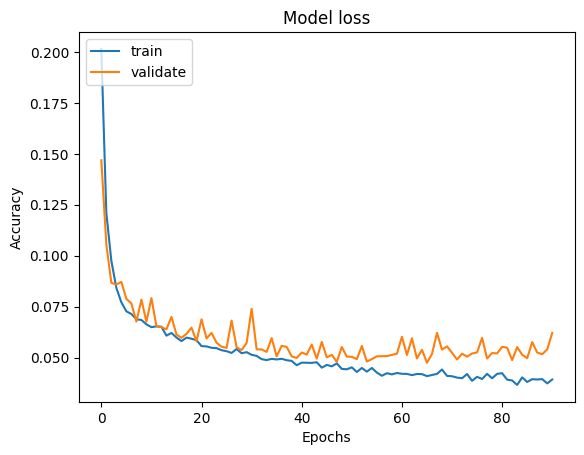

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model loss')
plt.legend(['train' , 'validate'] , loc = 'upper left')
plt.show()

In [ ]:
# Doing a roundoff of a age values so it be either 0 or 1.
i = 0
pred_l = []
while(i<len(pred)):
    pred_l.append(int(np.round(pred[i])))
    i += 1



<ipython-input-80-d0cee21407dc>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(np.round(pred[i])))


In [ ]:
print(pred_l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(len(pred_l))

4004


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
results = confusion_matrix(Y_test , pred_l)

<Axes: >

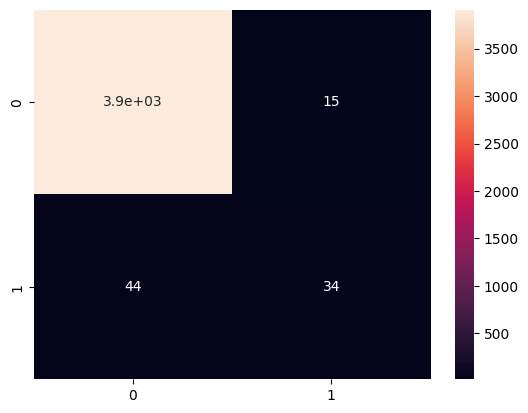

In [ ]:
import seaborn as sns
sns.heatmap(results, annot=True)

In [ ]:
def test_image(ind , images , normalize_img , Model):
    plt.imshow(images[ind])
    image_test = normalize_img[ind]
    pred_l = Model.predict(np.array([image_test]))
    bald_f = ['Not Bald' , 'Bald']
    bald = int(np.round(pred_l))
    print('Person is a ' + bald_f[bald])


1/1 [==============================] - 0s 66ms/step
Person is a Bald


<ipython-input-89-a639bf86802c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bald = int(np.round(pred_l))


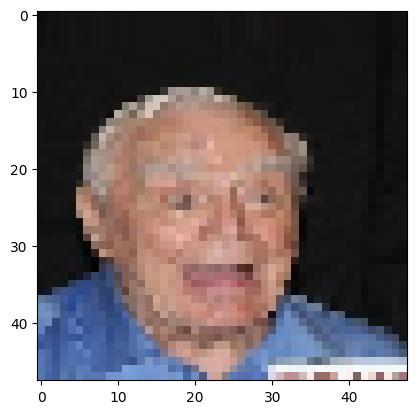

In [ ]:
test_image(345, images , image_f , Model)

1/1 [==============================] - 0s 18ms/step
Person is a Bald


<ipython-input-89-a639bf86802c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bald = int(np.round(pred_l))


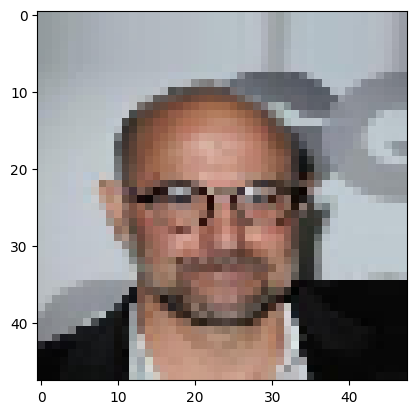

In [ ]:
test_image(45, images , image_f , Model)

1/1 [==============================] - 0s 18ms/step
Person is a Bald


<ipython-input-89-a639bf86802c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bald = int(np.round(pred_l))


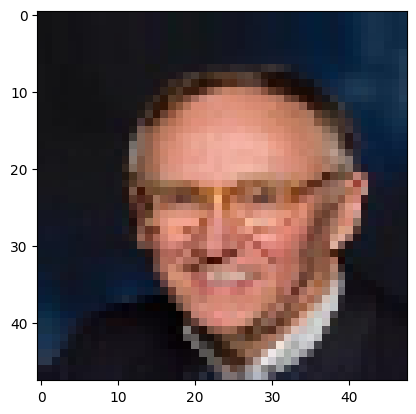

In [ ]:
test_image(278, images , image_f , Model)

1/1 [==============================] - 0s 27ms/step
Person is a Not Bald


<ipython-input-89-a639bf86802c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bald = int(np.round(pred_l))


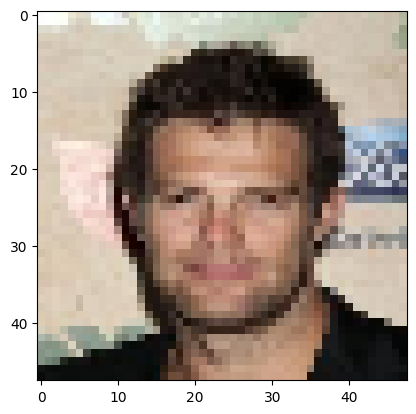

In [ ]:
test_image(11345, images , image_f , Model)

1/1 [==============================] - 0s 60ms/step
Person is a Not Bald


<ipython-input-89-a639bf86802c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bald = int(np.round(pred_l))


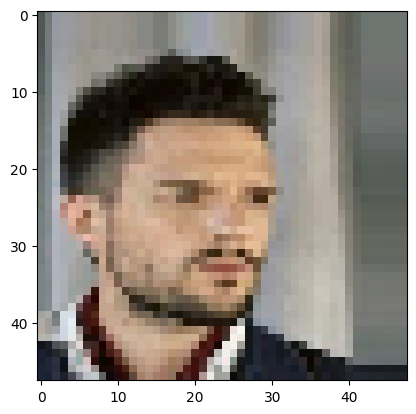

In [ ]:
test_image(13456, images , image_f , Model)

1/1 [==============================] - 0s 47ms/step
Person is a Not Bald


<ipython-input-89-a639bf86802c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bald = int(np.round(pred_l))


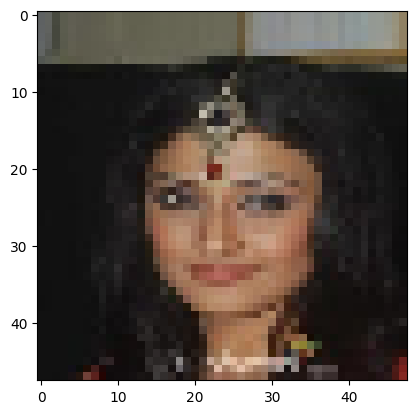

In [ ]:
test_image(19567, images , image_f , Model)